# <font color='blue'>Predição de Preço</font>


In [ ]:
# Version of Python
from platform import python_version
print('Version of Python used on this Notebook:', python_version())

Version of Python used on this Notebook: 3.6.9


## Objetivo
Prever o preço da estadia de imóveis feature 'Price'.

## Importando módulos e bibliotecas
Dataset fornecido pela Airbnb

In [ ]:
# Importing modules
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import colorsys
plt.style.use('seaborn-talk')
import numpy as np
%matplotlib inline

In [ ]:
pd.__version__

'1.1.5'

In [ ]:
mat.__version__

'3.2.2'

In [ ]:
# My machine is a laptop then I Use Google Colab power, that requires a github repository to read data correctly

In [ ]:
# picking dataset from github and importing to Google Colab

In [ ]:
! git clone https://github.com/Johnson-Rodrigues/ifood.git

Cloning into 'ifood'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
# Uploading dataset
df = pd.read_csv("ifood/ml_project1_data.csv")

In [ ]:
# Checking data shape
df.shape

(2240, 29)

In [ ]:
# Verifying dataset head
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Checking last lines
df.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [ ]:
# Creating column Age because age is more significant then a Year_Birth.

In [ ]:
from datetime import datetime

In [ ]:
year_c = datetime.now()

# Converting Current year to string in the desired format (YYYY) using strftime
# and then to int.
year_c = int(year_c.strftime('%Y'))
print (year_c)

2021


In [ ]:
df['Age'] = year_c - pd.to_numeric(df['Year_Birth'])

In [ ]:
print (df)

         ID  Year_Birth   Education  ... Z_Revenue  Response  Age
0      5524        1957  Graduation  ...        11         1   64
1      2174        1954  Graduation  ...        11         0   67
2      4141        1965  Graduation  ...        11         0   56
3      6182        1984  Graduation  ...        11         0   37
4      5324        1981         PhD  ...        11         0   40
...     ...         ...         ...  ...       ...       ...  ...
2235  10870        1967  Graduation  ...        11         0   54
2236   4001        1946         PhD  ...        11         0   75
2237   7270        1981  Graduation  ...        11         0   40
2238   8235        1956      Master  ...        11         0   65
2239   9405        1954         PhD  ...        11         1   67

[2240 rows x 30 columns]


In [ ]:
# Creating column Years_Costumer because time since first buy is more significant then a date.
df["Years_Costumer"] = pd.to_datetime("now") - pd.to_datetime(df["Dt_Customer"])
df["Years_Costumer"] = df["Years_Costumer"].astype(str)
df["Years_Costumer"] = df["Years_Costumer"].str.slice(0,4,1)
df["Years_Costumer"] = pd.to_numeric(df['Years_Costumer'])/365

In [ ]:
print(df)

         ID  Year_Birth   Education  ... Response  Age  Years_Costumer
0      5524        1957  Graduation  ...        1   64        8.443836
1      2174        1954  Graduation  ...        0   67        6.936986
2      4141        1965  Graduation  ...        0   56        7.482192
3      6182        1984  Graduation  ...        0   37        7.008219
4      5324        1981         PhD  ...        0   40        7.068493
...     ...         ...         ...  ...      ...  ...             ...
2235  10870        1967  Graduation  ...        0   54        7.671233
2236   4001        1946         PhD  ...        0   75        6.679452
2237   7270        1981  Graduation  ...        0   40        7.052055
2238   8235        1956      Master  ...        0   65        7.054795
2239   9405        1954         PhD  ...        1   67        8.331507

[2240 rows x 31 columns]


In [ ]:
# Copy of Dataset to a new with columns of interest. Excluding ID.
df1 = df[["Age","Years_Costumer","Education","Marital_Status","Income","Kidhome","Teenhome","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Complain","Response"]]

In [ ]:
# ONLY to make an analysis I make another copy of dataset for a positive return of Campaign.
df2 = df1.loc[(df1["Response"]==1), ["Age","Years_Costumer","Education","Marital_Status","Income","Kidhome","Teenhome","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Complain"]]

In [ ]:
df2.tail()

,Age,Years_Costumer,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain
2194,64,8.536986,Graduation,Married,73803.0,0,1,61,833,80,363,52,26,174,2,9,5,6,6,0,0,1,0,0,0
2198,67,7.657534,Graduation,Married,50501.0,1,1,10,297,0,38,13,0,152,7,5,4,4,6,0,0,1,0,0,0
2202,48,8.323288,PhD,YOLO,48432.0,0,1,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0
2221,39,7.613699,Master,Single,75777.0,0,0,12,712,26,538,69,13,80,1,3,6,11,1,0,0,0,1,1,0
2239,67,8.331507,PhD,Married,52869.0,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0


In [ ]:
print (df2)

      Age  Years_Costumer   Education  ... AcceptedCmp4  AcceptedCmp5  Complain
0      64        8.443836  Graduation  ...            0             0         0
8      47        7.690411         PhD  ...            0             0         0
15     75        8.221918         PhD  ...            0             1         0
33     69        8.293151         PhD  ...            0             0         0
39     78        8.032877         PhD  ...            0             0         0
...   ...             ...         ...  ...          ...           ...       ...
2194   64        8.536986  Graduation  ...            0             0         0
2198   67        7.657534  Graduation  ...            0             0         0
2202   48        8.323288         PhD  ...            0             0         0
2221   39        7.613699      Master  ...            1             1         0
2239   67        8.331507         PhD  ...            0             0         0

[334 rows x 25 columns]


Exploratory Analysis

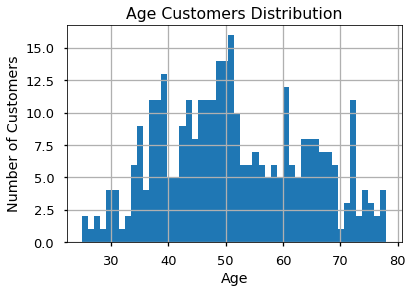

In [ ]:
# Age Customers Distribution who accepted the offer?

# Histogram
df2.hist(column="Age",bins = 50)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Customers Distribution")
plt.show()

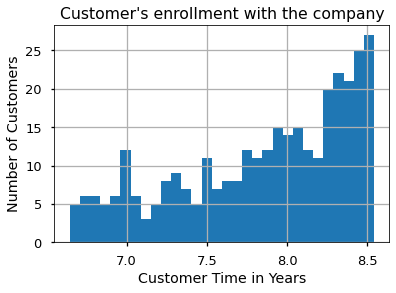

In [ ]:
# Customer's enrollment with the company distribution?

# Histogram

df2.hist(column="Years_Costumer",bins = 30)
plt.xlabel("Customer Time in Years")
plt.ylabel("Number of Customers")
plt.title("Customer's enrollment with the company")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


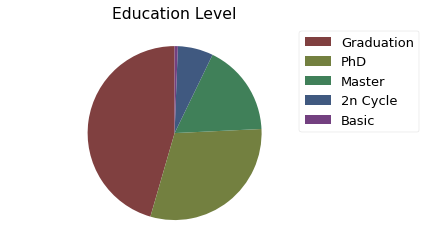

In [ ]:
# Costumer's Level of Education distribution.

# Setting quantity
num = len(df2.Education.value_counts().index)

# List of Colors
listHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listHSV))
labels = df2.Education.value_counts().index
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

# Pie Chart
slices, texto = plt.pie(df2.Education.value_counts(), colors = listRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(slices, labels, bbox_to_anchor = (1.25, 1))
plt.title("Education Level")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


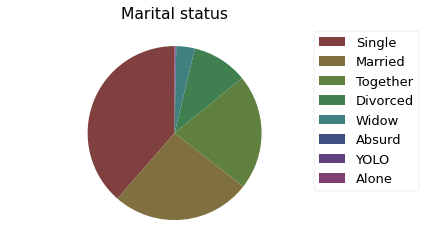

In [ ]:
# Costumer's Marital status distribution.

num = len(df2.Marital_Status.value_counts().index)

listHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listHSV))
labels = df2.Marital_Status.value_counts().index
#colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

slices, texto = plt.pie(df1.Marital_Status.value_counts(), colors = listRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(slices, labels, bbox_to_anchor = (1.25, 1))
plt.title("Marital status")
plt.show()

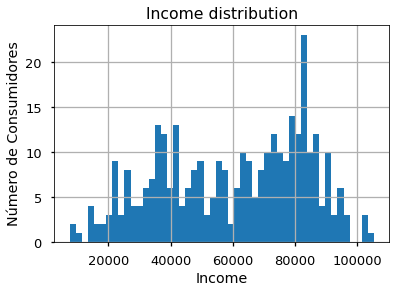

In [ ]:
# Income distribution who accepted the offer?

# Histogram
#data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)
df2.hist(column="Income",bins = 50)
plt.xlabel("Income")
plt.ylabel("Number of Costumers")
plt.title("Income distribution")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


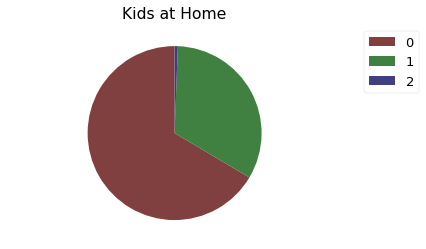

In [ ]:
# Small children at costumer's household distribution.

num = len(df2.Kidhome.value_counts().index)

listHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listHSV))
labels = df2.Kidhome.value_counts().index
#colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

slices, texto = plt.pie(df2.Kidhome.value_counts(), colors = listRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(slices, labels, bbox_to_anchor = (1.25, 1))
plt.title("Kids at Home")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


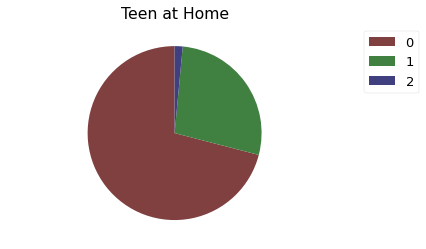

In [ ]:
# Number of teenagers at costumer's household distribution.

num = len(df2.Teenhome.value_counts().index)

listHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listHSV))
labels = df2.Teenhome.value_counts().index
#colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

slices, texto = plt.pie(df2.Teenhome.value_counts(), colors = listRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(slices, labels, bbox_to_anchor = (1.25, 1))
plt.title("Teen at Home")
plt.show()

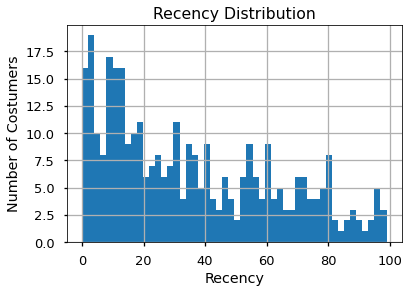

In [ ]:
# Number of days since the last purchase distribution who accepted the offer.

df2.hist(column="Recency",bins = 50)
plt.xlabel("Recency")
plt.ylabel("Number of Costumers")
plt.title("Recency Distribution")
plt.show()

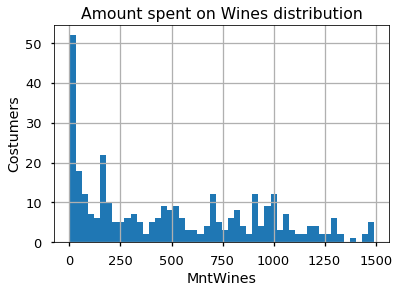

In [ ]:
# Amount spent on Wines distribution.

df2.hist(column="MntWines",bins = 50)
plt.xlabel("MntWines")
plt.ylabel("Costumers")
plt.title("Amount spent on Wines distribution")
plt.show()

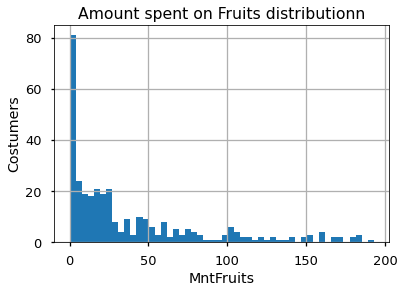

In [ ]:
# Amount spent on Fruits distribution.

df2.hist(column="MntFruits",bins = 50)
plt.xlabel("MntFruits")
plt.ylabel("Costumers")
plt.title("Amount spent on Fruits distributionn")
plt.show()

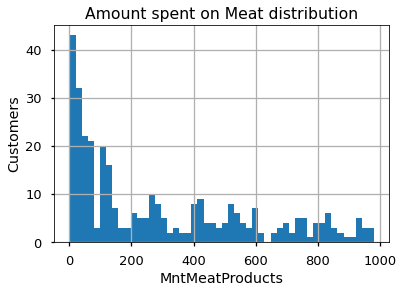

In [ ]:
# Amount spent on Meat distribution

df2.hist(column="MntMeatProducts",bins = 50)
plt.xlabel("MntMeatProducts")
plt.ylabel("Customers")
plt.title("Amount spent on Meat distribution")
plt.show()

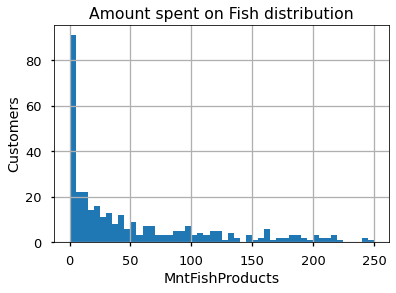

In [ ]:
# Amount spent on Fish distribution

df2.hist(column="MntFishProducts",bins = 50)
plt.xlabel("MntFishProducts")
plt.ylabel("Customers")
plt.title("Amount spent on Fish distribution")
plt.show()

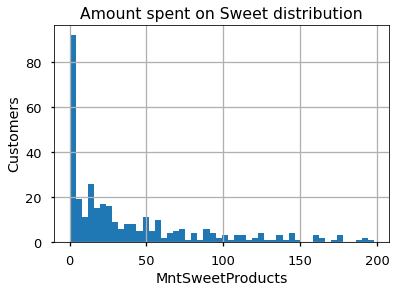

In [ ]:
# Amount spent on Sweet distribution

df2.hist(column="MntSweetProducts",bins = 50)
plt.xlabel("MntSweetProducts")
plt.ylabel("Customers")
plt.title("Amount spent on Sweet distribution")
plt.show()

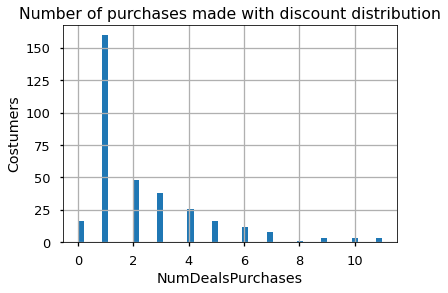

In [ ]:
# Number of purchases made with discount distribution

df2.hist(column="NumDealsPurchases",bins = 50)
plt.xlabel("NumDealsPurchases")
plt.ylabel("Costumers")
plt.title("Number of purchases made with discount distribution")
plt.show()

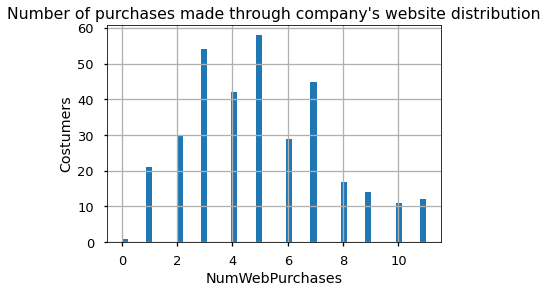

In [ ]:
# Number of purchases made through company's website distribution

df2.hist(column="NumWebPurchases",bins = 50)
plt.xlabel("NumWebPurchases")
plt.ylabel("Costumers")
plt.title("Number of purchases made through company's website distribution")
plt.show()

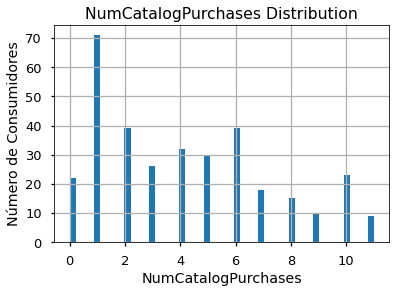

In [ ]:
# Number of purchases made using catalogue distribution.

df2.hist(column="NumCatalogPurchases",bins = 50)
plt.xlabel("NumCatalogPurchases")
plt.ylabel("Número de Consumidores")
plt.title("NumCatalogPurchases Distribution")
plt.show()

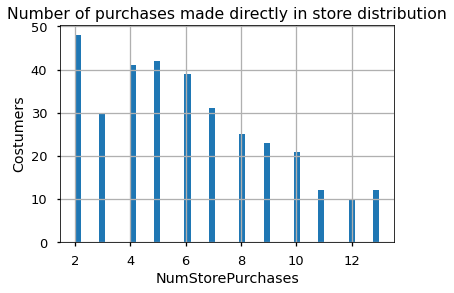

In [ ]:
# Number of purchases made directly in store distribution.

df2.hist(column="NumStorePurchases",bins = 50)
plt.xlabel("NumStorePurchases")
plt.ylabel("Costumers")
plt.title("Number of purchases made directly in store distribution")
plt.show()

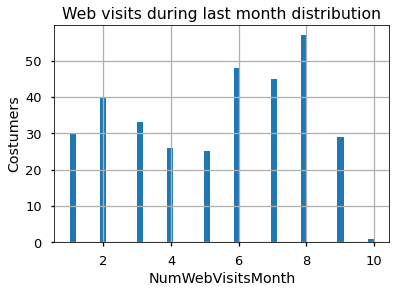

In [ ]:
# Number of web visits during last month distribution.

df2.hist(column="NumWebVisitsMonth",bins = 50)
plt.xlabel("NumWebVisitsMonth")
plt.ylabel("Costumers")
plt.title("Web visits during last month distribution")
plt.show()

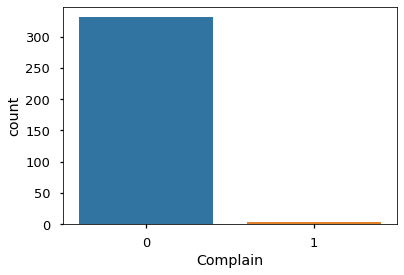

In [ ]:
# Costumer complained in the last 2 years?

# Bar plot

sns.countplot(df2['Complain']);

In [ ]:
# Checking null values
df2.isnull().sum()

Age                    0
Years_Costumer         0
Education              0
Marital_Status         0
Income                 1
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Complain               0
dtype: int64

In [ ]:
# Droping null values
df2.dropna(inplace=True)

In [ ]:
# Checking again null values
df2.isnull().sum()

Age                    0
Years_Costumer         0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Complain               0
dtype: int64

In [ ]:
# Identifying correlation between variables

def plot_corr(df2, size=32):
    corr = df2.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

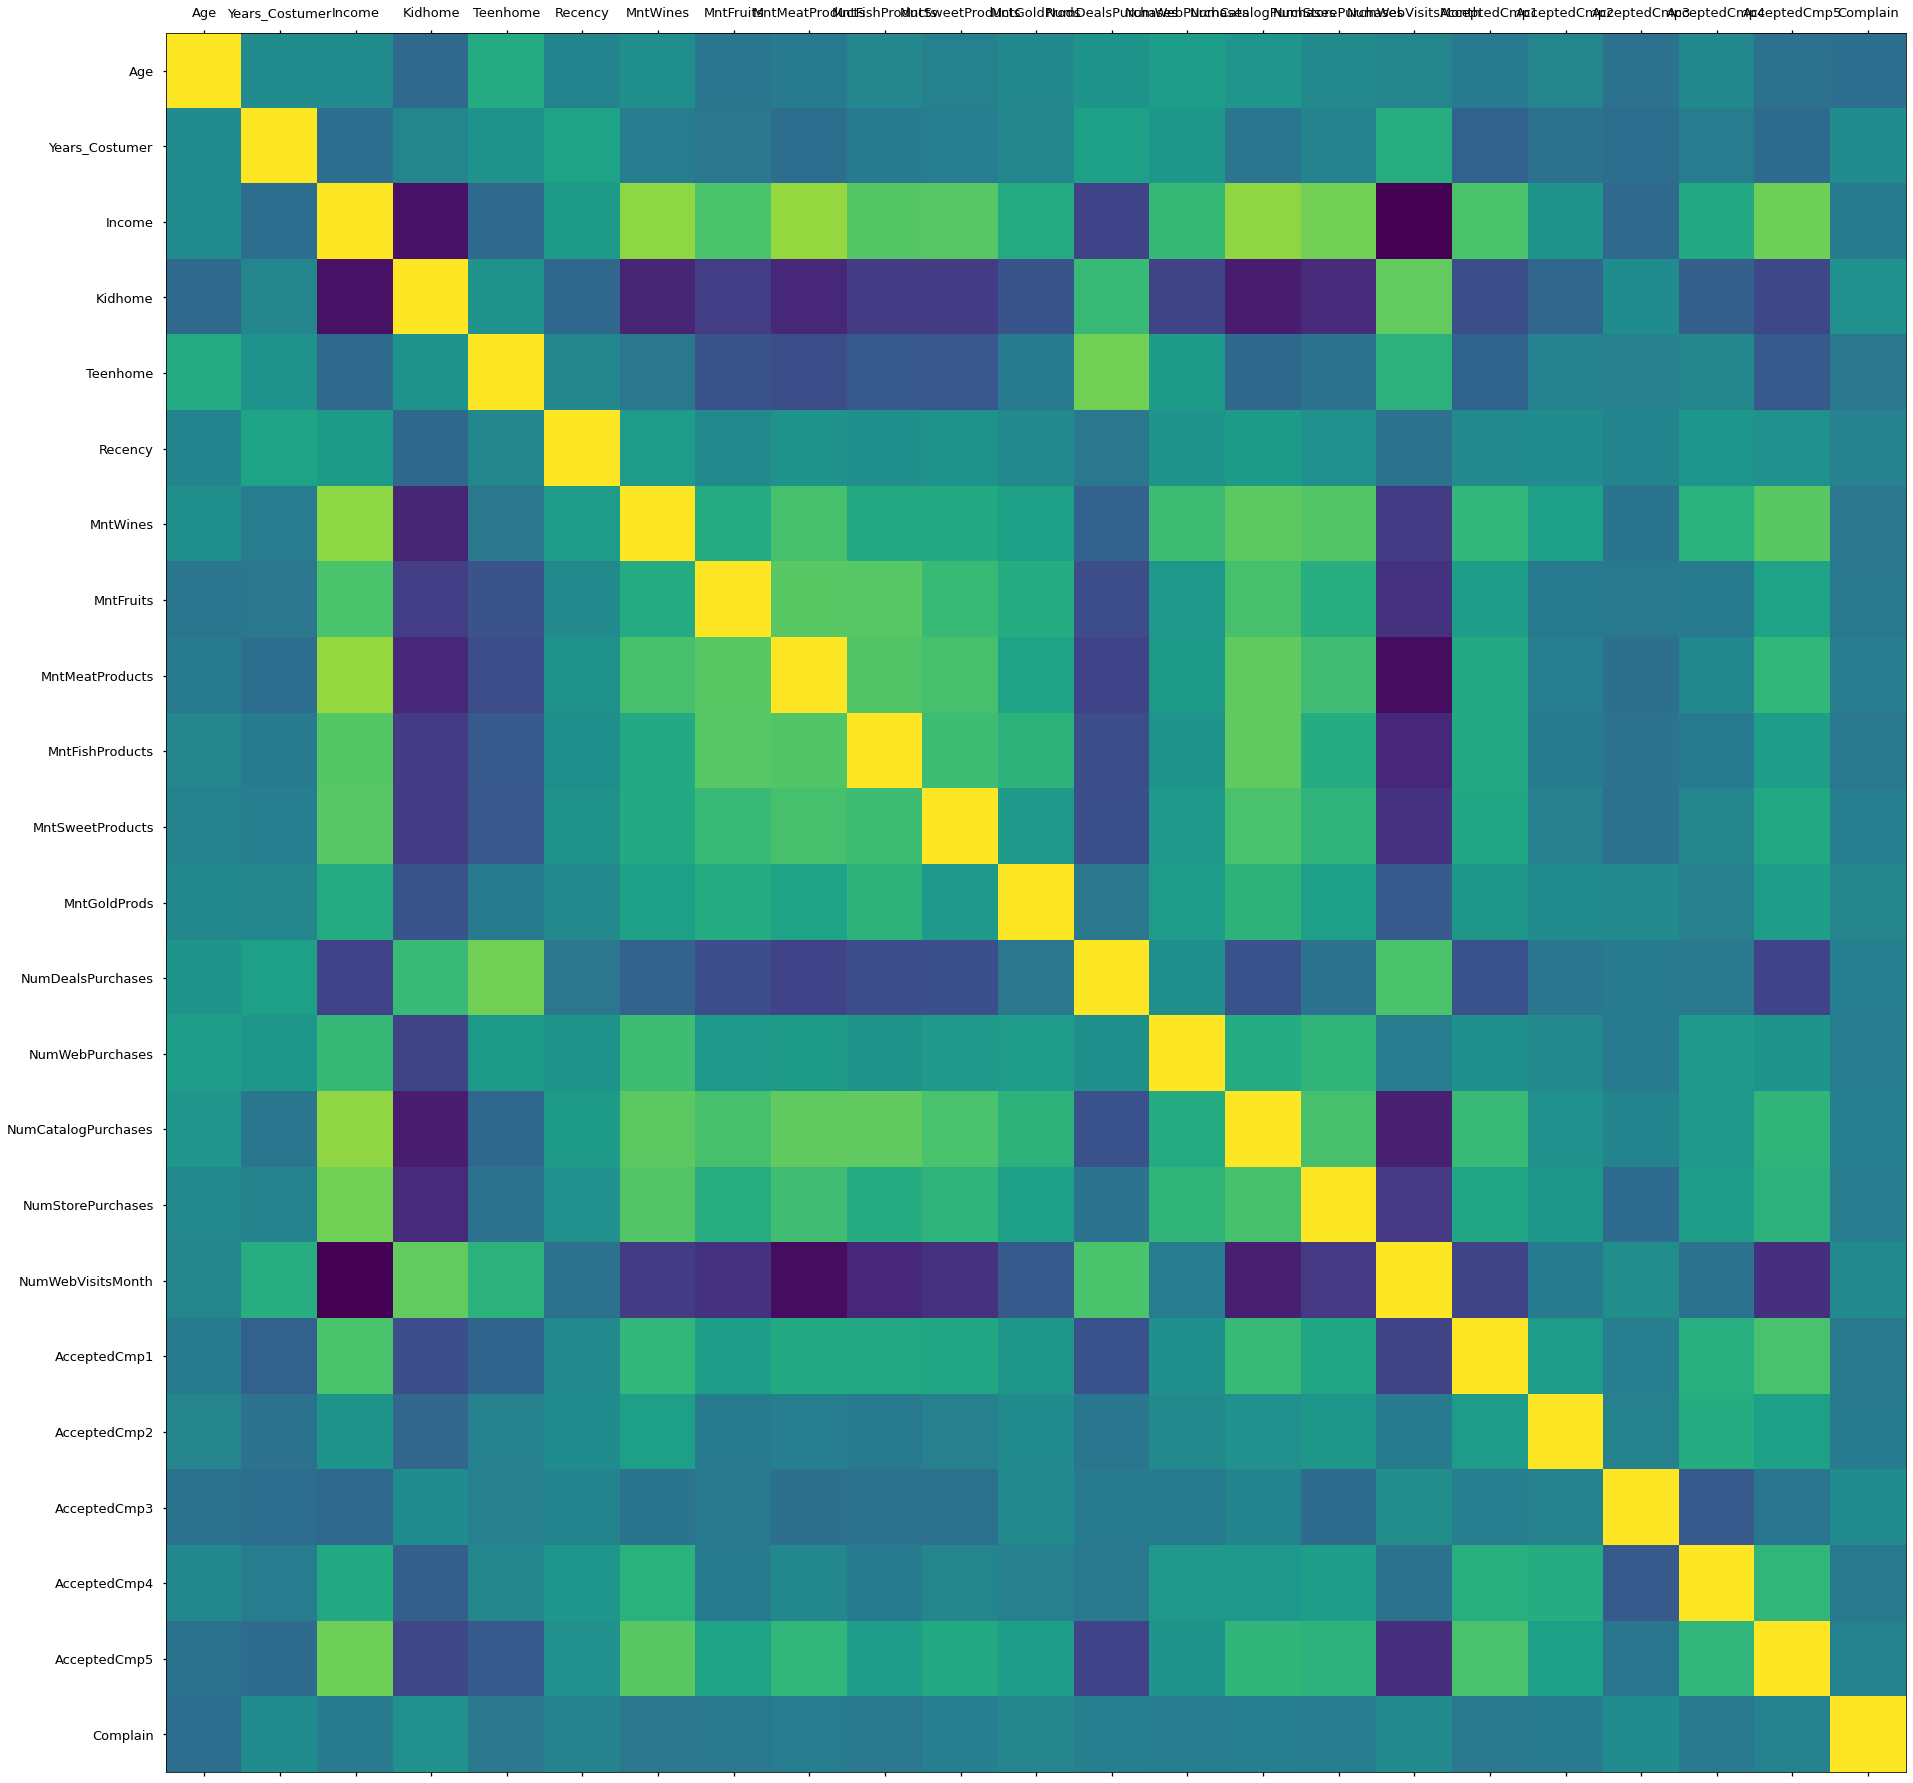

In [ ]:
# Ploting graph
plot_corr(df2)


In [ ]:
# Visualising correlation in a table

df2.corr()

,Age,Years_Costumer,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain
Age,1.000000,0.087405,0.088756,-0.156008,0.325148,0.037790,0.114519,-0.066356,-0.034759,0.056341,0.016616,0.060912,0.154752,0.218162,0.155778,0.066440,0.039221,-0.042917,0.043019,-0.099405,0.064985,-0.103385,-0.122640
Years_Costumer,0.087405,1.000000,-0.122755,0.048590,0.138321,0.264680,-0.010164,-0.063962,-0.122756,-0.034827,-0.004901,0.046162,0.238602,0.172634,-0.070874,0.027617,0.337193,-0.211469,-0.100226,-0.122766,-0.016833,-0.140267,0.096196
Income,0.088756,-0.122755,1.000000,-0.674707,-0.158357,0.198324,0.703895,0.499129,0.724620,0.539026,0.543935,0.326309,-0.407219,0.417701,0.709487,0.625294,-0.758301,0.499956,0.148939,-0.159292,0.306348,0.609860,-0.027329
Kidhome,-0.156008,0.048590,-0.674707,1.000000,0.138757,-0.161269,-0.574341,-0.439437,-0.560583,-0.452792,-0.453858,-0.299284,0.427882,-0.398161,-0.618197,-0.542791,0.578516,-0.334064,-0.177700,0.097110,-0.225352,-0.375729,0.128762
Teenhome,0.325148,0.138321,-0.158357,0.138757,1.000000,0.052202,-0.063407,-0.308163,-0.340096,-0.267094,-0.279760,-0.026000,0.625771,0.199349,-0.168486,-0.101834,0.371154,-0.189198,0.022428,0.005994,0.047138,-0.258265,-0.059305
Recency,0.037790,0.264680,0.198324,-0.161269,0.052202,1.000000,0.212743,0.074476,0.135313,0.115679,0.143509,0.067695,-0.063003,0.152869,0.201409,0.131458,-0.097965,0.079397,0.097043,0.034007,0.164125,0.129756,0.022139
MntWines,0.114519,-0.010164,0.703895,-0.574341,-0.063407,0.212743,1.000000,0.320943,0.488555,0.316219,0.315373,0.238214,-0.202217,0.452766,0.559024,0.530361,-0.445822,0.405330,0.236746,-0.082340,0.367889,0.552491,-0.058020
MntFruits,-0.066356,-0.063962,0.499129,-0.439437,-0.308163,0.074476,0.320943,1.000000,0.547348,0.541373,0.429683,0.327015,-0.341511,0.181555,0.488424,0.340215,-0.502871,0.219687,-0.037988,-0.044024,-0.024277,0.264928,-0.054640
MntMeatProducts,-0.034759,-0.122756,0.724620,-0.560583,-0.340096,0.135313,0.488555,0.547348,1.000000,0.519557,0.487425,0.259489,-0.401319,0.202409,0.567541,0.462215,-0.697756,0.313771,-0.007685,-0.111649,0.063898,0.403142,-0.016551
MntFishProducts,0.056341,-0.034827,0.539026,-0.452792,-0.267094,0.115679,0.316219,0.541373,0.519557,1.000000,0.453411,0.380370,-0.335123,0.152766,0.573261,0.328586,-0.553143,0.311801,-0.036612,-0.090728,-0.030246,0.221478,-0.053776


In [ ]:
# Verifying null values
df1.isnull().sum()

Age                     0
Years_Costumer          0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Complain                0
Response                0
dtype: int64

In [ ]:
# Dropping null values
df1.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Checking data distribution
num_true = len(df1.loc[df['Response'] == 1])
num_false = len(df1.loc[df['Response'] == 0])
print("True cases : {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

True cases : 333 (15.03%)
False cases: 1883 (84.97%)


## Spliting

70% for training and 30% for testing

In [ ]:
import sklearn as sk
sk.__version__

'0.22.2.post1'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Feature Selection
atributs = ["Age","Years_Costumer","Income","Kidhome","Teenhome","Recency","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","Complain"]

In [ ]:
# Predict variable
atrib_prev = ["Response"]

In [ ]:
# Creating objects
X = df1[atributs].values
Y = df1[atrib_prev].values

NameError: ignored

In [ ]:
X

In [ ]:
Y

In [ ]:
# Defining split size
split_test_size = 0.30

In [ ]:
# Creating training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [ ]:
# And the results are:
print("{0:0.2f}% training data".format((len(X_train)/len(df1.index)) * 100))
print("{0:0.2f}% testing data".format((len(X_test)/len(df1.index)) * 100))

In [ ]:
X_train

## Checking Split

In [ ]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df1.loc[df1['Response'] == 1]),
                                               (len(df1.loc[df1['Response'] ==1])/len(df1.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df1.loc[df['Response'] == 0]),
                                               (len(df1.loc[df['Response'] == 0])/len(df1.index) * 100)))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]),
                                               (len(Y_train[Y_train[:] == 1])/len(Y_train) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]),
                                               (len(Y_train[Y_train[:] == 0])/len(Y_train) * 100)))
print("")
print("Test True  : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]),
                                               (len(Y_test[Y_test[:] == 1])/len(Y_test) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]),
                                               (len(Y_test[Y_test[:] == 0])/len(Y_test) * 100)))

Original True  : 333 (15.03%)
Original False : 1883 (84.97%)

Training True  : 237 (15.28%)
Training False : 1314 (84.72%)

Test True  : 96 (14.44%)
Test False : 569 (85.56%)


## Checking hidden missing values



In [ ]:
# Checking missing values
df1.isnull().values.any()

False

In [ ]:
df1.head(5)

,Age,Years_Costumer,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,64,8.443836,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,67,6.936986,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,56,7.482192,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,37,7.008219,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,40,7.068493,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


## Building and training the model

In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Creating the model
model_v1 = GaussianNB()

In [ ]:
# Training
model_v1.fit(X_train, Y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Checking Accuracy of training data

In [ ]:
from sklearn import metrics

In [ ]:
nb_predict_train = model_v1.predict(X_train)

In [ ]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, nb_predict_train)))
print()

Accuracy: 0.8414



## Checking Accuracy of testing data

In [ ]:
nb_predict_test = model_v1.predict(X_test)

In [ ]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, nb_predict_test)))
print()

Accuracy: 0.8241



## Metrics

In [ ]:
# Creating a Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_test, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 21  75]
 [ 42 527]]

Classification Report
              precision    recall  f1-score   support

           1       0.33      0.22      0.26        96
           0       0.88      0.93      0.90       569

    accuracy                           0.82       665
   macro avg       0.60      0.57      0.58       665
weighted avg       0.80      0.82      0.81       665



# Optimizing with RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_v2 = RandomForestClassifier(random_state = 42)
model_v2.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Checking training data
rf_predict_train = model_v2.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, rf_predict_train)))

Accuracy: 0.9929


In [ ]:
# Checking testing data
rf_predict_test = model_v2.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, rf_predict_test)))
print()

Accuracy: 0.8602



In [ ]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_test, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 26  70]
 [ 23 546]]

Classification Report
              precision    recall  f1-score   support

           1       0.53      0.27      0.36        96
           0       0.89      0.96      0.92       569

    accuracy                           0.86       665
   macro avg       0.71      0.62      0.64       665
weighted avg       0.84      0.86      0.84       665



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Version 3 of model using Logistic Regression
model_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
model_v3.fit(X_train, Y_train.ravel())
lr_predict_test = model_v3.predict(X_test)

In [ ]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_test, lr_predict_test, labels = [1, 0]))

Accuracy: 0.8466

Classification Report
              precision    recall  f1-score   support

           1       0.38      0.10      0.16        96
           0       0.87      0.97      0.92       569

    accuracy                           0.85       665
   macro avg       0.63      0.54      0.54       665
weighted avg       0.80      0.85      0.81       665



In [ ]:
### Summary
## Accuracy using test data

# Naive Bayes         = 0.8241
# Random Forest       = 0.8602
# Logistic Regression = 0.8466

## Making predictions with the best model

In [ ]:
import pickle

In [ ]:
# Saving model for later
filename = 'model_trained_v2.sav'
pickle.dump(model_v2, open(filename, 'wb'))

In [ ]:
X_test

array([[5.90000000e+01, 6.77260274e+00, 5.25970000e+04, ...,
        8.00000000e+00, 5.00000000e+00, 0.00000000e+00],
       [3.50000000e+01, 6.99178082e+00, 3.43200000e+04, ...,
        2.00000000e+00, 8.00000000e+00, 0.00000000e+00],
       [4.90000000e+01, 7.64657534e+00, 3.85780000e+04, ...,
        3.00000000e+00, 8.00000000e+00, 0.00000000e+00],
       ...,
       [3.40000000e+01, 7.34794521e+00, 9.51690000e+04, ...,
        4.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.90000000e+01, 7.01643836e+00, 2.67590000e+04, ...,
        3.00000000e+00, 6.00000000e+00, 0.00000000e+00],
       [5.00000000e+01, 7.46301370e+00, 7.18190000e+04, ...,
        5.00000000e+00, 6.00000000e+00, 0.00000000e+00]])

In [ ]:
# Loading model and making prediction with new data
# (X_test, Y_test can be a new set of data properly prepared)
loaded_model = pickle.load(open(filename, 'rb'))
result1 = loaded_model.predict(X_test[15].reshape(1, -1))
result2 = loaded_model.predict(X_test[25].reshape(1, -1))
print(result1)
print(result2)

[1]
[0]


# The End